In [1]:
#Part 1: KNN Implementation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statistics
# from statistics import mode
# from collections import Counter
import sklearn.metrics
import time

X_test = pd.read_csv("C:\\Users\\avons\\Downloads\\PS2_Q2_mnist_for_python_bonus\\mnist for python\\testX.csv")
X_test = np.asarray(X_test)
Y_test = pd.read_csv("C:\\Users\\avons\\Downloads\\PS2_Q2_mnist_for_python_bonus\\mnist for python\\testY.csv")
Y_test = np.asarray(Y_test)
X_train = pd.read_csv("C:\\Users\\avons\\Downloads\\PS2_Q2_mnist_for_python_bonus\\mnist for python\\trainX.csv")
X_train = np.asarray(X_train)
Y_train = pd.read_csv("C:\\Users\\avons\\Downloads\\PS2_Q2_mnist_for_python_bonus\\mnist for python\\trainY.csv")
Y_train = np.asarray(Y_train)

def knn(k):
    Y_test_pred = []
    dist_test_train_all = []
    print("I entered")
    for i in range(len(X_test)):
        test_train_pointwise = []
        for j in range(len(X_train)):
            #print("pre diff")
            #print(X_test[i])
            diff = 0
            for h in range(len(X_test[0])):
                diff += ((X_test[i][h] - X_train[j][h])**2)
            #diff = np.sum(X_test[i]-X_train[j])
            #print("post diff")
            #print("All okay before append to test_train_pointwise")
            test_train_pointwise.append(np.power(diff,0.5))
            #print("All okay after append to test_train_pointwise")
        dist_test_train_all.append(test_train_pointwise)
    print("Found distances")
    positions_min_set = []
    for m in range(len(dist_test_train_all)):
        temp = np.argsort(dist_test_train_all[m])[:k]
        positions_min_set.append(temp)
    print("Found positions")
    actual_vals_neighbors = []
    for n in range(len(positions_min_set)):
        translate_pos_labels = []
        for l in range(len(positions_min_set[n])):
            pos = positions_min_set[n][l]
            translate_pos_labels.append(Y_train[pos][0])
        actual_vals_neighbors.append(translate_pos_labels)
    print("Found neighbours")
    #print("Neighbors", actual_vals_neighbors)
  
    for g in range(len(actual_vals_neighbors)):
        mnist_label_count = np.zeros(10)
        for b in range(len(actual_vals_neighbors[g])):
            mnist_label_count[actual_vals_neighbors[g][b]] += 1
        #print(mnist_label_count)
        Y_test_pred.append(np.argmax(mnist_label_count))
        #Y_test_pred.append(mode())
    return (Y_test_pred)

knn_trials = [1,5,10,15,20]
plot_acc = []
time_speed = []
f1_acc = []
for t in range(len(knn_trials)):
    start = time.time()
    knn_pred = knn(knn_trials[t])
    end = time.time()
    time_speed.append(end-start)
    plot_acc.append(sklearn.metrics.accuracy_score(Y_test,knn_pred))
    f1_acc.append(sklearn.metrics.f1_score(Y_test,knn_pred, average="micro"))


# knn_10 = knn(10)
# print(sklearn.metrics.accuracy_score(Y_test,knn_))

I entered
Found distances
Found positions
Found neighbours
I entered
Found distances
Found positions
Found neighbours
I entered
Found distances
Found positions
Found neighbours
I entered
Found distances
Found positions
Found neighbours
I entered
Found distances
Found positions
Found neighbours


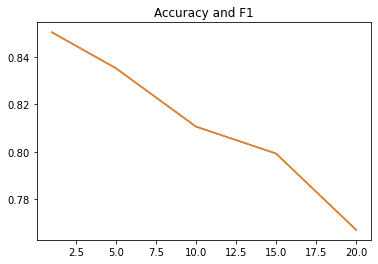

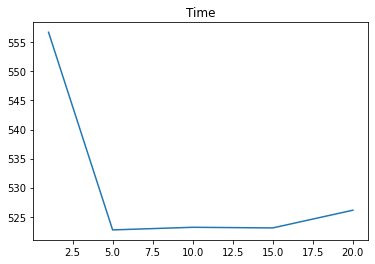

In [4]:
plt.plot(knn_trials,plot_acc,label='Acc')
plt.plot(knn_trials,f1_acc,label='F1')
plt.title("Accuracy and F1")
plt.show()
plt.plot(knn_trials,time_speed)
plt.title("Time")
plt.show()

Part 2:
In order to reduce the number of points in the dataset, it is necessary to reduce them randomly in order to not create any conscious bias in the train dataset.  To do this, I would employ sklearn's train_test_split on the given X_train to further split the training dataset and then perform KNN on the train subset of X_train.

In [5]:
#Part 3: KNN Implementation with point reduction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statistics
# from statistics import mode
# from collections import Counter
import sklearn.metrics
from sklearn.model_selection import train_test_split
import time

X_test = pd.read_csv("C:\\Users\\avons\\Downloads\\PS2_Q2_mnist_for_python_bonus\\mnist for python\\testX.csv")
X_test = np.asarray(X_test)
Y_test = pd.read_csv("C:\\Users\\avons\\Downloads\\PS2_Q2_mnist_for_python_bonus\\mnist for python\\testY.csv")
Y_test = np.asarray(Y_test)
X_train = pd.read_csv("C:\\Users\\avons\\Downloads\\PS2_Q2_mnist_for_python_bonus\\mnist for python\\trainX.csv")
X_train = np.asarray(X_train)
Y_train = pd.read_csv("C:\\Users\\avons\\Downloads\\PS2_Q2_mnist_for_python_bonus\\mnist for python\\trainY.csv")
Y_train = np.asarray(Y_train)
print(X_train.shape,Y_train.shape)
def knn(k, drop_size=0.2):
    X_train_sub,X_test_drop,Y_train_sub, Y_test_drop = train_test_split(X_train,Y_train, test_size=drop_size,random_state=42)
    Y_test_pred = []
    dist_test_train_all = []
    print(X_train_sub.shape, Y_train_sub.shape)
    print("I entered")
    for i in range(len(X_test)):
        test_train_pointwise = []
        for j in range(len(X_train_sub)):
            #print("pre diff")
            #print(X_test[i])
            diff = 0
            for h in range(len(X_test[0])):
                diff += ((X_test[i][h] - X_train_sub[j][h])**2)
            #diff = np.sum(X_test[i]-X_train[j])
            #print("post diff")
            #print("All okay before append to test_train_pointwise")
            test_train_pointwise.append(np.power(diff,0.5))
            #print("All okay after append to test_train_pointwise")
        dist_test_train_all.append(test_train_pointwise)
    print("Found distances")
    positions_min_set = []
    for m in range(len(dist_test_train_all)):
        temp = np.argsort(dist_test_train_all[m])[:k]
        positions_min_set.append(temp)
    print("Found positions")
    actual_vals_neighbors = []
    for n in range(len(positions_min_set)):
        translate_pos_labels = []
        for l in range(len(positions_min_set[n])):
            pos = positions_min_set[n][l]
            translate_pos_labels.append(Y_train_sub[pos])
        actual_vals_neighbors.append(translate_pos_labels)
    print("Found neighbours")
    #print("Neighbors", actual_vals_neighbors)
  
    for g in range(len(actual_vals_neighbors)):
        mnist_label_count = np.zeros(10)
        for b in range(len(actual_vals_neighbors[g])):
            mnist_label_count[actual_vals_neighbors[g][b]] += 1
        #print(mnist_label_count)
        Y_test_pred.append(np.argmax(mnist_label_count))
        #Y_test_pred.append(mode())
    return (Y_test_pred)

knn_trials = [1,5,10,15,20]
plot_acc_i = []
time_speed_i = []
f1_acc_i = []

#dropping 10% of the data
for a in range(len(knn_trials)):
    start = time.time()
    knn_pred = knn(knn_trials[a],drop_size=0.05)
    end = time.time()
    time_speed_i.append(end-start)
    plot_acc_i.append(sklearn.metrics.accuracy_score(Y_test,knn_pred))
    f1_acc_i.append(sklearn.metrics.f1_score(Y_test,knn_pred, average="micro"))

plot_acc_v = []
time_speed_v = []
f1_acc_v = []

#dropping 10% of the data
for v in range(len(knn_trials)):
    start = time.time()
    knn_pred = knn(knn_trials[v],drop_size=0.1)
    end = time.time()
    time_speed_v.append(end-start)
    plot_acc_v.append(sklearn.metrics.accuracy_score(Y_test,knn_pred))
    f1_acc_v.append(sklearn.metrics.f1_score(Y_test,knn_pred, average="micro"))

plot_acc_0 = []
time_speed_0 = []
f1_acc_0 = []

#dropping 20% of the data
for t in range(len(knn_trials)):
    start = time.time()
    knn_pred = knn(knn_trials[t],drop_size=0.2)
    end = time.time()
    time_speed_0.append(end-start)
    plot_acc_0.append(sklearn.metrics.accuracy_score(Y_test,knn_pred))
    f1_acc_0.append(sklearn.metrics.f1_score(Y_test,knn_pred, average="micro"))

plot_acc_1 = []
time_speed_1 = []
f1_acc_1 = []
#dropping 30% of the data
for p in range(len(knn_trials)):
    start = time.time()
    knn_pred = knn(knn_trials[p],drop_size=0.3)
    end = time.time()
    time_speed_1.append(end-start)
    plot_acc_1.append(sklearn.metrics.accuracy_score(Y_test,knn_pred))
    f1_acc_1.append(sklearn.metrics.f1_score(Y_test,knn_pred, average="micro"))

plot_acc_2 = []
time_speed_2 = []
f1_acc_2 = []
#dropping 40% of the data
for r in range(len(knn_trials)):
    start = time.time()
    knn_pred = knn(knn_trials[r],drop_size=0.4)
    end = time.time()
    time_speed_2.append(end-start)
    plot_acc_2.append(sklearn.metrics.accuracy_score(Y_test,knn_pred))
    f1_acc_2.append(sklearn.metrics.f1_score(Y_test,knn_pred, average="micro"))


(470, 784) (470, 1)
(446, 784) (446, 1)
I entered
Found distances
Found positions
Found neighbours
(446, 784) (446, 1)
I entered
Found distances
Found positions
Found neighbours
(446, 784) (446, 1)
I entered
Found distances
Found positions
Found neighbours
(446, 784) (446, 1)
I entered
Found distances
Found positions
Found neighbours
(446, 784) (446, 1)
I entered
Found distances
Found positions
Found neighbours
(423, 784) (423, 1)
I entered
Found distances
Found positions
Found neighbours
(423, 784) (423, 1)
I entered
Found distances
Found positions
Found neighbours
(423, 784) (423, 1)
I entered
Found distances
Found positions
Found neighbours
(423, 784) (423, 1)
I entered
Found distances
Found positions
Found neighbours
(423, 784) (423, 1)
I entered
Found distances
Found positions
Found neighbours
(376, 784) (376, 1)
I entered
Found distances
Found positions
Found neighbours
(376, 784) (376, 1)
I entered
Found distances
Found positions
Found neighbours
(376, 784) (376, 1)
I entered
Fo

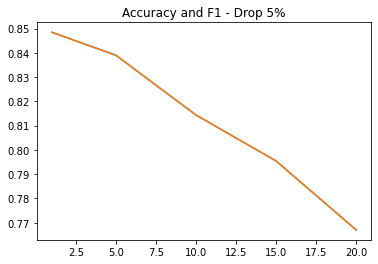

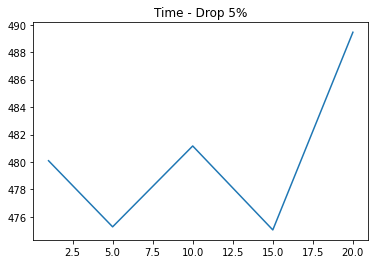

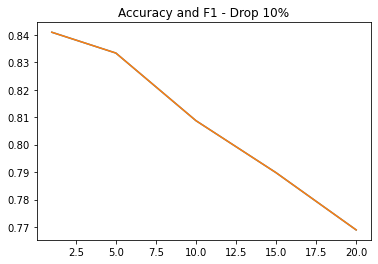

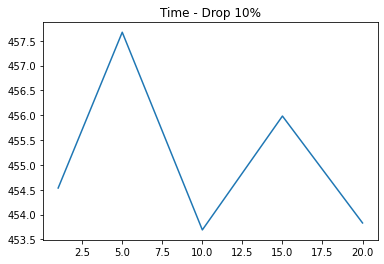

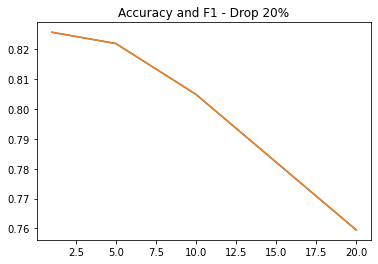

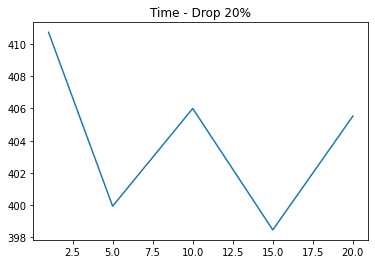

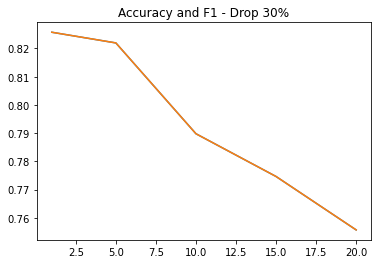

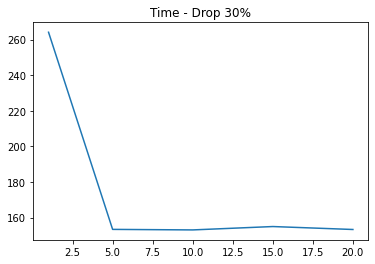

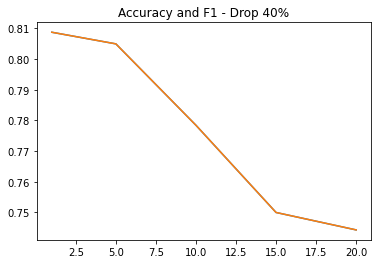

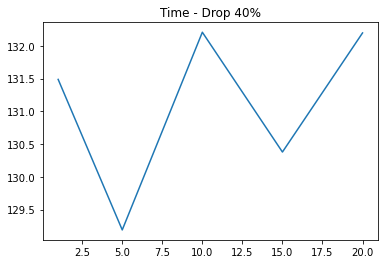

In [6]:
plt.plot(knn_trials,plot_acc_i,label='Acc')
plt.plot(knn_trials,f1_acc_i,label='F1')
plt.title("Accuracy and F1 - Drop 5%")
plt.show()
plt.plot(knn_trials,time_speed_i)
plt.title("Time - Drop 5%")
plt.show()

plt.plot(knn_trials,plot_acc_v,label='Acc')
plt.plot(knn_trials,f1_acc_v,label='F1')
plt.title("Accuracy and F1 - Drop 10%")
plt.show()
plt.plot(knn_trials,time_speed_v)
plt.title("Time - Drop 10%")
plt.show()

plt.plot(knn_trials,plot_acc_0,label='Acc')
plt.plot(knn_trials,f1_acc_0,label='F1')
plt.title("Accuracy and F1 - Drop 20%")
plt.show()
plt.plot(knn_trials,time_speed_0)
plt.title("Time - Drop 20%")
plt.show()

plt.plot(knn_trials,plot_acc_1,label='Acc')
plt.plot(knn_trials,f1_acc_1,label='F1')
plt.title("Accuracy and F1 - Drop 30%")
plt.show()
plt.plot(knn_trials,time_speed_1)
plt.title("Time - Drop 30%")
plt.show()

plt.plot(knn_trials,plot_acc_2,label='Acc')
plt.plot(knn_trials,f1_acc_2,label='F1')
plt.title("Accuracy and F1 - Drop 40%")
plt.show()
plt.plot(knn_trials,time_speed_2)
plt.title("Time - Drop 40%")
plt.show()